In [20]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import matplotlib
from matplotlib import pyplot
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
import itertools

import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, MaxPool2D
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
from sklearn.model_selection import KFold
from tensorflow.python.keras import Sequential
from tensorflow.python.keras.optimizers import SGD

from keras.utils.np_utils import to_categorical
from keras.optimizers import RMSprop
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau

In [21]:
# This cell makes it possible to get somewhat reproducible results
seed_value= 0
import os
os.environ['PYTHONHASHSEED']=str(seed_value)
import random
random.seed(seed_value)

np.random.seed(seed_value)

import tensorflow as tf
tf.random.set_seed(seed_value)

## Downloading the data

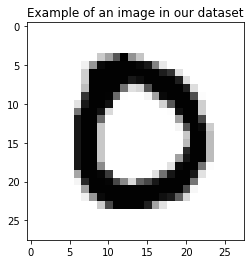

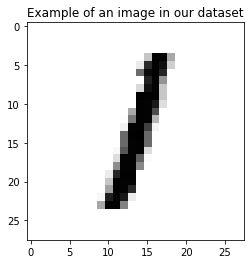

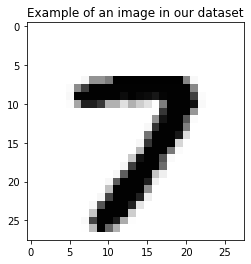

In [22]:
# Downlaoding the data
y = pd.read_csv('handwritten_digits_labels.csv')

X_data = pd.read_csv('handwritten_digits_images.csv')

# Visualize some of the images

x_data = X_data.to_numpy().reshape(X_data.shape[0], 28, 28)
matplotlib.pyplot.imshow(x_data[0], cmap="Greys")
pyplot.title('Example of an image in our dataset')
pyplot.show()

x_data = X_data.to_numpy().reshape(X_data.shape[0], 28, 28)
matplotlib.pyplot.imshow(x_data[10000], cmap="Greys")
pyplot.title('Example of an image in our dataset')
pyplot.show()

x_data = X_data.to_numpy().reshape(X_data.shape[0], 28, 28)
matplotlib.pyplot.imshow(x_data[50000], cmap="Greys")
pyplot.title('Example of an image in our dataset')
pyplot.show()

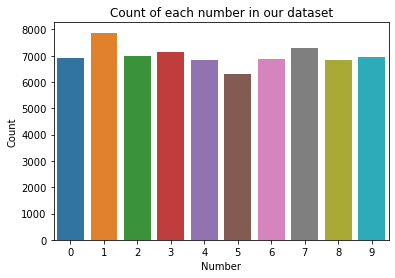

In [23]:
# Plot the number of each digit
sns.countplot(y['0'].values)
pyplot.xlabel('Number')
pyplot.ylabel('Count')
pyplot.title('Count of each number in our dataset')
pyplot.show()

## Train, val and test sets

In [24]:
X_train, X_val_test, y_train, y_val_test = train_test_split(X_data, y, test_size=0.3, random_state=44)
X_val, X_test, y_val, y_test = train_test_split(X_val_test, y_val_test, test_size=0.5, random_state=4)

# Reshapeing the y sets
y_train = y_train.to_numpy().reshape(1,-1)[0]
y_val = y_val.to_numpy().reshape(1,-1)[0]
y_test = y_test.to_numpy().reshape(1,-1)[0]

# Reshapeing the X sets such that we can use them in neural networks
X_train2 = X_train.to_numpy().reshape(X_train.shape[0], 28, 28, 1) / 255.0 # Reshapes and normalize each pixel value from 0 to 1 insted of from 0 to 255 (Makes it easier to train)
X_val2 = X_val.to_numpy().reshape(X_val.shape[0], 28, 28, 1) / 255.0
X_test2 = X_test.to_numpy().reshape(X_test.shape[0], 28, 28, 1) / 255.0

# Reshapeing the y sets such that we can use them in neural networks
y_train2 = to_categorical(y_train, num_classes = 10)
y_val2 = to_categorical(y_val, num_classes = 10)
y_test2 = to_categorical(y_test, num_classes = 10)

## Random forrest classifier

In [6]:
# A function that predicts using random forrest classifier
def pred_rfc(X_train, y_train, X, md, ne):
    rfc = RandomForestClassifier(max_depth=md, n_estimators=ne, random_state=0)
    rfc.fit(X_train, y_train)
    y_pred = rfc.predict(X)
    return y_pred

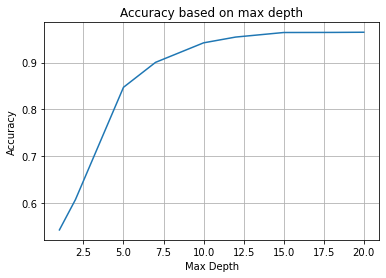

In [7]:
hp_md = [1, 2, 5, 7, 10, 12, 15, 18, 20]

as_rfc = []

for i in hp_md:
    y_pred_rfc = pred_rfc(X_train, y_train, X_val, i, 50)
    as_rfc.append(accuracy_score(y_val, y_pred_rfc))

# Plots the accuracy based on max depth  
plt.plot(hp_md, as_rfc)
plt.title('Accuracy based on max depth')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.grid()
plt.show()



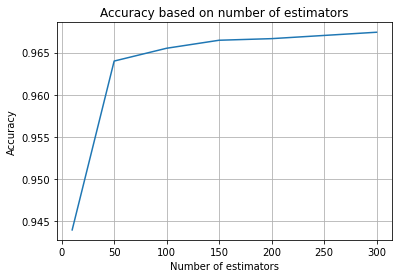

In [8]:
hp_ne = [10, 50, 100, 150, 200, 300]

as_rfc2 = []

for i in hp_ne:
    y_pred_rfc = pred_rfc(X_train, y_train, X_val, 15, i)
    as_rfc2.append(accuracy_score(y_val, y_pred_rfc))

# Plots the accuracy based on number of estimators  
plt.plot(hp_ne, as_rfc2)
plt.title('Accuracy based on number of estimators')
plt.xlabel('Number of estimators')
plt.ylabel('Accuracy')
plt.grid()
plt.show()

In [9]:
# Test accuracy on validation data for our best max depth and number of estimators.
y_pred_val = pred_rfc(X_train, y_train, X_val, 15, 300)

print('The accuracy for our random forrest classifier on validation data is ' + str(accuracy_score(y_val, y_pred_val)))

The accuracy for our random forrest classifier on validation data is 0.9674285714285714


## Support vector classifier

In [10]:
# Building a SVC with kernel rbf and prints the accuracy on validation data.
svm = SVC(C=0.5,kernel="rbf")
svm.fit(X_train, y_train)
y_predict = svm.predict(X_val)

print('The accuracy for our support vector classifier using rbf and C=0.5 on validation data is ' + str(accuracy_score(y_val, y_predict)))

The accuracy for our support vector classifier using rbf and C=0.5 on validation data is 0.9733333333333334


In [11]:
# Building a SVC with kernel rbf and prints the accuracy on validation data.
svm = SVC(C=1,kernel="rbf")
svm.fit(X_train, y_train)
y_predict = svm.predict(X_val)

print('The accuracy for our support vector classifier using rbf and C=1 on validation data is ' + str(accuracy_score(y_val, y_predict)))

The accuracy for our support vector classifier using rbf and C=1 on validation data is 0.9775238095238096


In [12]:
# Building a SVC with kernel rbf and prints the accuracy on validation data.
svm = SVC(C=1.5,kernel="rbf")
svm.fit(X_train, y_train)
y_predict = svm.predict(X_val)

print('The accuracy for our support vector classifier using rbf and C=1.5 on validation data is ' + str(accuracy_score(y_val, y_predict)))

The accuracy for our support vector classifier using rbf and C=1.5 on validation data is 0.9797142857142858


## Convolutional Neural Network

In [13]:
# Build the model
model1 = Sequential()

# Add layers
model1.add(Conv2D(filters = 32, kernel_size = (5,5), activation ='relu', input_shape = (28,28,1)))
model1.add(Conv2D(filters = 32, kernel_size = (5,5), activation ='relu'))
model1.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model1.add(Dropout(0.25)) # Avoid overfitting

model1.add(Flatten())
model1.add(Dense(10, activation = "softmax")) # We choose 10 beacuse we have 10 digits, softmax gives us a probability distribution

# Compile the model
model1.compile(optimizer = 'adam', 
              loss = 'categorical_crossentropy', 
              metrics = ['accuracy'])

# Fit the model
history1 = model1.fit(X_train2, y_train2, epochs = 1, validation_data = (X_val2, y_val2))

pred1 = np.argmax(model1.predict(X_val2), axis = 1)
print('Accuracy on validation data is ', str(accuracy_score(y_val, pred1)))

1532/1532 [==============================] - 74s 48ms/step - loss: 0.1508 - accuracy: 0.9546 - val_loss: 0.0557 - val_accuracy: 0.9839
Accuracy on validation data is  0.983904761904762


## Try with more epochs

Since it is a big difference between training accuracy and valiadtion accuracy we should try with more epochs.

In [14]:
# Build the model
model1 = Sequential()

# Add layers
model1.add(Conv2D(filters = 32, kernel_size = (5,5), activation ='relu', input_shape = (28,28,1)))
model1.add(Conv2D(filters = 32, kernel_size = (5,5), activation ='relu'))
model1.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model1.add(Dropout(0.25)) # Avoid overfitting

model1.add(Flatten())
model1.add(Dense(10, activation = "softmax")) # We choose 10 beacuse we have 10 digits, softmax gives us a probability distribution

# Compile the model
model1.compile(optimizer = 'adam', 
              loss = 'categorical_crossentropy', 
              metrics = ['accuracy'])

# Try to add some more epochs
history2 = model1.fit(X_train2, y_train2, epochs = 4, validation_data = (X_val2, y_val2))

pred2 = np.argmax(model1.predict(X_val2), axis = 1)
print('Accuracy on validation data is ', str(accuracy_score(y_val, pred2)))

Epoch 1/4
1532/1532 [==============================] - 74s 48ms/step - loss: 0.1473 - accuracy: 0.9552 - val_loss: 0.0573 - val_accuracy: 0.9833
Epoch 2/4
1532/1532 [==============================] - 76s 50ms/step - loss: 0.0546 - accuracy: 0.9833 - val_loss: 0.0478 - val_accuracy: 0.9841
Epoch 3/4
1532/1532 [==============================] - 70s 46ms/step - loss: 0.0399 - accuracy: 0.9875 - val_loss: 0.0479 - val_accuracy: 0.9850
Epoch 4/4
1532/1532 [==============================] - 72s 47ms/step - loss: 0.0328 - accuracy: 0.9896 - val_loss: 0.0339 - val_accuracy: 0.9910
Accuracy on validation data is  0.9909523809523809


## Try to add more layers

In [25]:
# What happens if we add another layer?

# Build the model
model2 = Sequential()

# Add layers
model2.add(Conv2D(filters = 64, kernel_size = (5,5), activation ='relu', input_shape = (28,28,1)))
model2.add(Conv2D(filters = 64, kernel_size = (5,5), activation ='relu'))
model2.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model2.add(Dropout(0.25))

model2.add(Conv2D(filters = 32, kernel_size = (3,3), activation ='relu'))
model2.add(Conv2D(filters = 32, kernel_size = (3,3), activation ='relu'))
model2.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model2.add(Dropout(0.25))

model2.add(Flatten())
model2.add(Dense(10, activation = "softmax")) # We choose 10 beacuse we have 10 digits

# Compile the model
model2.compile(optimizer='adam', 
               loss='categorical_crossentropy', 
               metrics=['accuracy'])


# Fit the model
history3 = model2.fit(X_train2, y_train2, epochs = 4, validation_data = (X_val2, y_val2))

pred3 = np.argmax(model2.predict(X_val2), axis = 1)
print('Accuracy on validation data is ', str(accuracy_score(y_val, pred3)))

Epoch 1/4
1532/1532 [==============================] - 154s 101ms/step - loss: 0.2162 - accuracy: 0.9305 - val_loss: 0.0649 - val_accuracy: 0.9793
Epoch 2/4
1532/1532 [==============================] - 150s 98ms/step - loss: 0.0714 - accuracy: 0.9782 - val_loss: 0.0436 - val_accuracy: 0.9869
Epoch 3/4
1532/1532 [==============================] - 148s 96ms/step - loss: 0.0526 - accuracy: 0.9839 - val_loss: 0.0390 - val_accuracy: 0.9880
Epoch 4/4
1532/1532 [==============================] - 157s 103ms/step - loss: 0.0443 - accuracy: 0.9861 - val_loss: 0.0304 - val_accuracy: 0.9906
Accuracy on validation data is  0.9905714285714285


## Try to do some data augmentation 

In [16]:
# Try using ImageDataGenerator to avoid overfitting
augmentation = ImageDataGenerator(samplewise_center=False,
                            featurewise_center=False,
                            featurewise_std_normalization=False,  
                            samplewise_std_normalization=False,
                            zca_whitening=False,
                            rotation_range=10, 
                            zoom_range = 0.1,
                            width_shift_range = 0.2, 
                            height_shift_range = 0.2,
                            horizontal_flip=False,  
                            vertical_flip=False)


augmentation.fit(X_train2)

In [17]:
# Build the model
model3 = Sequential()

# Add layers
model3.add(Conv2D(filters = 32, kernel_size = (5,5), activation ='relu', input_shape = (28,28,1)))
model3.add(Conv2D(filters = 32, kernel_size = (5,5), activation ='relu'))
model3.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model3.add(Dropout(0.25)) # Avoid overfitting

model3.add(Flatten())
model3.add(Dense(10, activation = "softmax")) # We choose 10 beacuse we have 10 digits, softmax gives us a probability distribution

# Compile the model
model3.compile(optimizer = 'adam', 
              loss = 'categorical_crossentropy', 
              metrics = ['accuracy'])

# Fit the model with our new data
history4 = model3.fit(X_train2, y_train2, epochs = 4, validation_data = (X_val2, y_val2))

pred4 = np.argmax(model3.predict(X_val2), axis = 1)
print('Accuracy on validation data is ', str(accuracy_score(y_val, pred4)))

Epoch 1/4
1532/1532 [==============================] - 73s 47ms/step - loss: 0.1492 - accuracy: 0.9551 - val_loss: 0.0635 - val_accuracy: 0.9806
Epoch 2/4
1532/1532 [==============================] - 73s 48ms/step - loss: 0.0543 - accuracy: 0.9838 - val_loss: 0.0458 - val_accuracy: 0.9870
Epoch 3/4
1532/1532 [==============================] - 69s 45ms/step - loss: 0.0412 - accuracy: 0.9870 - val_loss: 0.0404 - val_accuracy: 0.9881
Epoch 4/4
1532/1532 [==============================] - 69s 45ms/step - loss: 0.0314 - accuracy: 0.9901 - val_loss: 0.0331 - val_accuracy: 0.9910
Accuracy on validation data is  0.9910476190476191


In [18]:
# Build the model
model4 = Sequential()

# Add layers
model4.add(Conv2D(filters = 64, kernel_size = (5,5), activation ='relu', input_shape = (28,28,1)))
model4.add(Conv2D(filters = 64, kernel_size = (5,5), activation ='relu'))
model4.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model4.add(Dropout(0.25))

model4.add(Conv2D(filters = 32, kernel_size = (3,3), activation ='relu'))
model4.add(Conv2D(filters = 32, kernel_size = (3,3), activation ='relu'))
model4.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model4.add(Dropout(0.25))

model4.add(Flatten())
model4.add(Dense(10, activation = "softmax")) # We choose 10 beacuse we have 10 digits

# Compile the model
model4.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Fit the model with our new data
history5 = model4.fit(X_train2, y_train2, epochs = 4, validation_data = (X_val2, y_val2))

pred5 = np.argmax(model4.predict(X_val2), axis = 1)
print('Accuracy on validation data is ', str(accuracy_score(y_val, pred5)))

Epoch 1/4
1532/1532 [==============================] - 165s 108ms/step - loss: 0.2124 - accuracy: 0.9319 - val_loss: 0.0536 - val_accuracy: 0.9838
Epoch 2/4
1532/1532 [==============================] - 154s 101ms/step - loss: 0.0682 - accuracy: 0.9790 - val_loss: 0.0420 - val_accuracy: 0.9878
Epoch 3/4
1532/1532 [==============================] - 164s 107ms/step - loss: 0.0527 - accuracy: 0.9834 - val_loss: 0.0354 - val_accuracy: 0.9894
Epoch 4/4
1532/1532 [==============================] - 153s 100ms/step - loss: 0.0420 - accuracy: 0.9869 - val_loss: 0.0341 - val_accuracy: 0.9897
Accuracy on validation data is  0.9897142857142858


## Testing the best model

0.9874285714285714


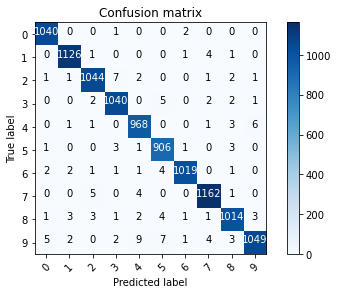

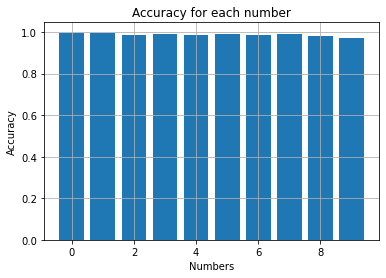

[0.99712368168744, 0.9938217122683142, 0.9858356940509915, 0.9885931558935361, 0.9877551020408163, 0.9901639344262295, 0.988360814742968, 0.9914675767918089, 0.9816069699903195, 0.9695009242144177]


In [19]:
# Make predictions
pred = np.argmax(model3.predict(X_test2), axis = 1)
# Print accuracy
print(accuracy_score(y_test, pred))


# Making the confusion matrix
cm = confusion_matrix(y_test, pred)
classes = range(10)

plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion matrix')
plt.colorbar()
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)


thresh = cm.max() / 2.
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, cm[i, j],
    horizontalalignment="center",
    color="white" if cm[i, j] > thresh else "black")

plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()


# Finding the accuracy of each digit
accuracy_number = []
for i in range(len(cm)):
    accuracy_number.append(cm[i,i]/sum(cm[i]))
    
plt.bar(range(10), accuracy_number)
plt.title('Accuracy for each number')
plt.xlabel('Numbers')
plt.ylabel('Accuracy')
plt.grid()
plt.show()
print(accuracy_number)